In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
# Read in the generation-levels-detail by dataset
# Data from https://www.census.gov/housing/hvs/data/histtab14.xlsx, Table 14 updaeted to filter by year, added average of quarters, removed revision rows, deleted columns
home_ownership_rates_by_year_df = pd.read_csv("./resources-KA/HomeOwnerShipByYear.csv")
home_ownership_rates_by_year_df.head()  


,Year,Region,Avg of Qtrs
0,1964,United States,63.1
1,1965,United States,63.0
2,1966,United States,63.5
3,1967,United States,63.6
4,1968,United States,63.9


In [3]:
home_ownership_rates_by_year_df.dtypes

Year             int64
Region          object
Avg of Qtrs    float64
dtype: object

In [5]:

# Update Year column to integer
# Remove rows with non-finite 'Year' values
home_ownership_rates_by_year_df = home_ownership_rates_by_year_df[home_ownership_rates_by_year_df['Year'].notna()]

# Change the 'Year' column to datetime format, extract the year, and convert it to integer
home_ownership_rates_by_year_df['Year'] = pd.to_datetime(home_ownership_rates_by_year_df['Year'], format='%Y').dt.year.astype(int)

# Display the DataFrame
home_ownership_rates_by_year_df.head()

,Year,Region,Avg of Qtrs
0,1964,United States,63.1
1,1965,United States,63.0
2,1966,United States,63.5
3,1967,United States,63.6
4,1968,United States,63.9


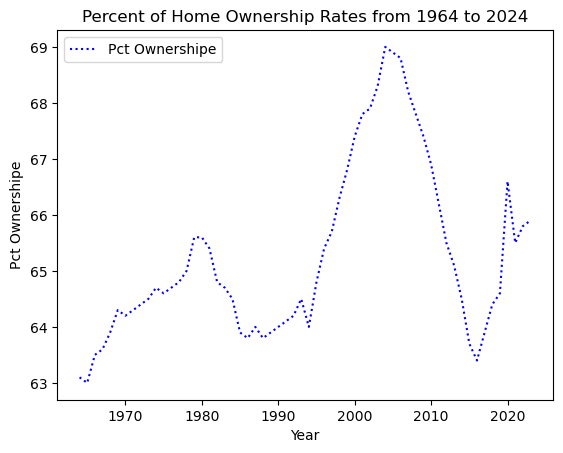

In [5]:
# Create a line chart to show the average of quarters from 1964 to 2024 for home ownership rates
# Define line styles
line_styles = [':']
plt.figsize=(20,10)
# Create a line chart
plt.plot(home_ownership_rates_by_year_df['Year'], home_ownership_rates_by_year_df['Avg of Qtrs'], linestyle=':', color='blue', label='Pct Ownershipe')


# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Pct Ownershipe')
plt.title('Percent of Home Ownership Rates from 1964 to 2024')
plt.legend()

# Display the plot
plt.show()

In [7]:
# Read in the how home ownership rates have changed by age group over the years dataset 
# Data from https://www.census.gov/housing/hvs/data/histtab19.xlsx, Table 19 updaeted to filter by year, 
ownership_rates_by_age_year_df = pd.read_csv("./resources-KA/HomeOwnership_By_Age_Year.csv")
ownership_rates_by_age_year_df.head(122)  

,Year,Qtr,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1994.0,1st,63.8,37.1,64.4,75.0,79.3,77.4,NaN,NaN,NaN,NaN,NaN
1,1994.0,3rd,63.8,36.8,64.6,75.2,79.1,77.2,NaN,NaN,NaN,NaN,NaN
2,1994.0,3rd,64.1,37.5,64.3,75.5,79.4,77.2,NaN,NaN,NaN,NaN,NaN
3,1994.0,4th,64.2,38.0,64.7,74.9,79.2,77.7,NaN,NaN,NaN,NaN,NaN
4,1995.0,1st,64.2,37.7,64.9,74.9,79.4,77.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2023.0,2nd,65.9,38.5,63.1,70.8,75.5,78.9,NaN,NaN,NaN,NaN,NaN
118,2023.0,3rd,66.0,38.3,62.9,71.0,75.4,79.2,NaN,NaN,NaN,NaN,NaN
119,2023.0,4th,65.7,38.1,62.0,70.3,76.0,79.0,NaN,NaN,NaN,NaN,NaN
120,2024.0,1st,65.6,37.7,61.4,70.8,76.3,78.7,NaN,NaN,NaN,NaN,NaN


In [8]:
ownership_rates_by_age_year_df.dtypes

Year                  float64
Qtr                    object
U.S.                  float64
Under 35 years        float64
35 to 44 years        float64
45 to 54 years        float64
55 to 64 years        float64
65 years and over     float64
Unnamed: 8            float64
Unnamed: 9            float64
Unnamed: 10           float64
Unnamed: 11           float64
Unnamed: 12           float64
dtype: object

In [9]:
# Remove decimal values from the 'Year' column
# Fill NA values with 0
ownership_rates_by_age_year_df['Year'] = ownership_rates_by_age_year_df['Year'].fillna(0)

# Change the data type of the 'Year' column to int64
ownership_rates_by_age_year_df['Year'] = ownership_rates_by_age_year_df['Year'].astype('int64')

# Display the DataFrame
ownership_rates_by_age_year_df.head()

,Year,Qtr,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1994,1st,63.8,37.1,64.4,75.0,79.3,77.4,NaN,NaN,NaN,NaN,NaN
1,1994,3rd,63.8,36.8,64.6,75.2,79.1,77.2,NaN,NaN,NaN,NaN,NaN
2,1994,3rd,64.1,37.5,64.3,75.5,79.4,77.2,NaN,NaN,NaN,NaN,NaN
3,1994,4th,64.2,38.0,64.7,74.9,79.2,77.7,NaN,NaN,NaN,NaN,NaN
4,1995,1st,64.2,37.7,64.9,74.9,79.4,77.5,NaN,NaN,NaN,NaN,NaN


In [10]:
# Convert columns to 1 decimal place for averaged values
# Select all columns except 'Year'
cols = [col for col in ownership_rates_by_age_year_df.columns if col != 'Year']

# Change the format of selected columns to one decimal place
ownership_rates_by_age_year_df[cols] = ownership_rates_by_age_year_df[cols].round(1)

# Display the DataFrame
ownership_rates_by_age_year_df.head()

,Year,Qtr,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1994,1st,63.8,37.1,64.4,75.0,79.3,77.4,NaN,NaN,NaN,NaN,NaN
1,1994,3rd,63.8,36.8,64.6,75.2,79.1,77.2,NaN,NaN,NaN,NaN,NaN
2,1994,3rd,64.1,37.5,64.3,75.5,79.4,77.2,NaN,NaN,NaN,NaN,NaN
3,1994,4th,64.2,38.0,64.7,74.9,79.2,77.7,NaN,NaN,NaN,NaN,NaN
4,1995,1st,64.2,37.7,64.9,74.9,79.4,77.5,NaN,NaN,NaN,NaN,NaN


In [11]:
# Data frame clean up
# Delete the 'Qtr' column
ownership_rates_by_age_year_df = ownership_rates_by_age_year_df.drop('Qtr', axis=1)


# Display the DataFrame
ownership_rates_by_age_year_df.head()

,Year,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1994,63.8,37.1,64.4,75.0,79.3,77.4,NaN,NaN,NaN,NaN,NaN
1,1994,63.8,36.8,64.6,75.2,79.1,77.2,NaN,NaN,NaN,NaN,NaN
2,1994,64.1,37.5,64.3,75.5,79.4,77.2,NaN,NaN,NaN,NaN,NaN
3,1994,64.2,38.0,64.7,74.9,79.2,77.7,NaN,NaN,NaN,NaN,NaN
4,1995,64.2,37.7,64.9,74.9,79.4,77.5,NaN,NaN,NaN,NaN,NaN


In [12]:

# Delete all unnamed columns
ownership_rates_by_age_year_df = ownership_rates_by_age_year_df.loc[:, ~ownership_rates_by_age_year_df.columns.str.contains('^Unnamed')]

# Display the DataFrame
ownership_rates_by_age_year_df.head()

,Year,U.S.,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over
0,1994,63.8,37.1,64.4,75.0,79.3,77.4
1,1994,63.8,36.8,64.6,75.2,79.1,77.2
2,1994,64.1,37.5,64.3,75.5,79.4,77.2
3,1994,64.2,38.0,64.7,74.9,79.2,77.7
4,1995,64.2,37.7,64.9,74.9,79.4,77.5


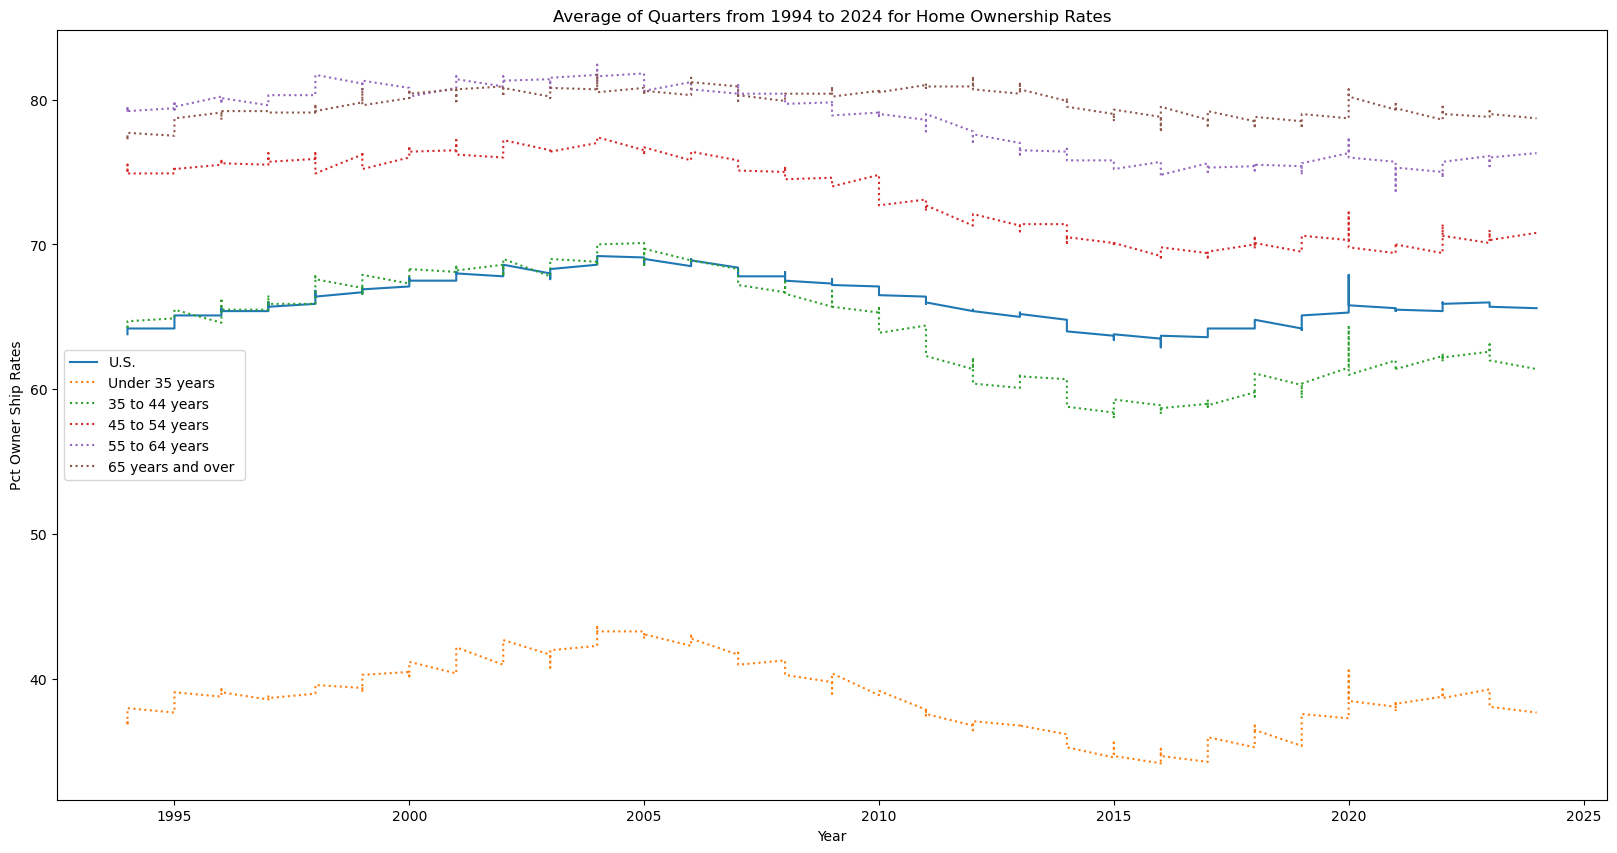

In [16]:
# Create a line chart to show the average of quarters from 1964 to 2024 for home ownership rates
# plt.figsize=(20,100)
# # Set 'Year' as index 
# if 'Year' in ownership_rates_by_age_year_df.columns:
#     ownership_rates_by_age_year_df.set_index('Year', inplace=True)

# # Create a line chart for all columns
# ownership_rates_by_age_year_df.plot(kind='line')
# Define line styles
line_styles = ['-', ':', ':', ':', ':', ':']

# Create a new figure with specified size
plt.figure(figsize=(20, 10))

# Loop through each column
for i, column in enumerate(ownership_rates_by_age_year_df.columns):
    # Plot each column with a different line style
    ownership_rates_by_age_year_df[column].plot(kind='line', style=line_styles[i % len(line_styles)])

# Set the title and labels
plt.title('Average of Quarters from 1994 to 2024 for Home Ownership Rates')
plt.xlabel('Year')
plt.ylabel('Pct Owner Ship Rates')

# Add a legend
plt.legend()

# Show the plot
plt.show()
